## Plot cell lengths for WT, gtl1 df1 and hat7 quadruple mutants

In [1]:
library(tidyverse)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
sessionInfo()

R version 4.0.0 (2020-04-24)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 16.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/tmnolan7/anaconda3/envs/r_4/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] cowplot_1.1.0   forcats_0.5.0   stringr_1.4.0   dplyr_1.0.7    
 [5] purrr_0.3.4     readr_1.4.0     tidyr_1.1.4     tibble_3.1.5   
 [9] ggplot2_3.3.5   tidyverse_1.3.0

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-3.1   tidyselect_1.1.1 repr_1.1.0       haven_2.3.1     
 [5] color

In [3]:
measurements <- read_csv("./data/hat7_gtl1_cortex_cell_length_measurements.csv")


# keep only roots with data for at least 60 cells from the QC

keep <- filter(measurements, position >=60) # cumm_len >=2000

measurements_filtered <- filter(measurements, image %in% keep$image) 


── Column specification ────────────────────────────────────────────────────────
cols(
  geno = col_character(),
  treatment = col_character(),
  day = col_double(),
  cell_type = col_character(),
  image = col_character(),
  position = col_double(),
  cumm_len = col_double(),
  cell_len = col_double(),
  date = col_double(),
  notes = col_logical()
)




In [4]:
# number of roots per geno

each_image <- measurements_filtered %>%
  group_by(geno, image) %>%
  tally()
  
table(each_image$geno)


            gtl1df1 hat7 hb13 hb20 hb23                  WT 
                 26                  16                  51 

`geom_smooth()` using formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using formula 'y ~ s(x, bs = "cs")'



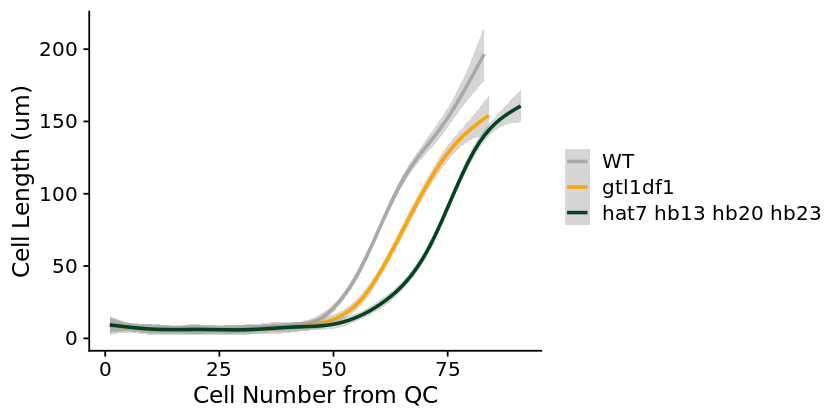

In [5]:
options(repr.plot.width=7, repr.plot.height=3.5)


# plot by geno
p <- ggplot(measurements_filtered, aes(x=position, y=cell_len, color=factor(geno, levels=c("WT", "gtl1df1", "hat7 hb13 hb20 hb23")))) +
#geom_point(alpha=0.2) + 
  scale_color_manual(values=c("darkgrey", "#FFA500", "#014421")) + 
  #scale_color_viridis_d() + 
  geom_smooth(method = "gam") + 
  xlab("Cell Number from QC") + 
  ylab("Cell Length (um)") 

p + theme_cowplot()  + 
  theme(legend.title=element_blank())

ggsave("./output/Cell_length_from_QC.pdf", width=7, height=3.5)